# Weather trend analysis :

The data  comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily).

The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.


In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

ModuleNotFoundError: No module named 'mplleaflet'

# Importing Data 

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from datetime import datetime
%matplotlib inline

df = pd.read_csv('data/weather_data.csv')

In [5]:
#Separating the month and day from the date
df['Month-Day']=df['Date'].apply(lambda x: x[5:6]+x[6:])
df=df[df['Month-Day']!='02-29'] #delete 29 february

#Max and min values from 2005 to 2014
max_values = df[df['Date']<'2015-01-01'].groupby('Month-Day').max()['Data_Value']
min_values = df[df['Date']<'2015-01-01'].groupby('Month-Day').min()['Data_Value']

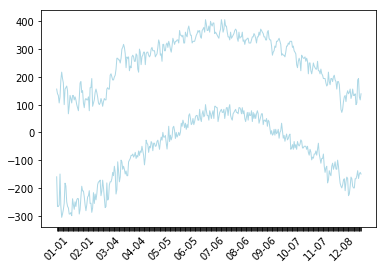

In [6]:
#Plot Values
fig ,ax = plt.subplots()
xn = range(len(max_values.index.tolist()))

plt.plot(xn,max_values,'lightblue',xn,min_values,'lightblue',lw=1) 
plt.xticks(xn,max_values.index.tolist(),rotation = 45)

#Showing ticks in xaxis every 31 days
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 31 != 0:
        label.set_visible(False)
# a little preview
#plt.show()

In [8]:
df2015=df[df['Date']>='2015-01-01'].sort_values('Date')
max2015=df2015.groupby('Month-Day').max()['Data_Value']
min2015=df2015.groupby('Month-Day').min()['Data_Value']

#Dataframes of diff btw 2015 and data btw 2005 to 2014
mx15=max2015-max_values
mn15= min2015 -min_values

#Indices where 2015 was higher or lower
x_max= np.where(max2015> max_values)[0].tolist()
x_min=np.where(min2015< min_values)[0].tolist()

# Plotting the broken decade long highs/lows in 2015

In [12]:
#Adding the scatter of broken high and low
scatter1= ax.scatter(x_max,max2015.iloc[x_max], s = 30, c = 'red')
scatter2 = ax.scatter(x_min,min2015.iloc[x_min],s=30,c='blue')
ax.set_xlabel('Month-Day')
ax.set_ylabel('Temperature in C°')

#Removing the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Setting title 
fig.set_size_inches(10,8)
ax.set_title('Broken decade high/low temperatures around the globe in 2015',fontsize=15)
ax.legend((scatter1,scatter2),('broken high in 2015','broken low in 2015'),
           scatterpoints=1,
           loc='lower center',
           ncol=1,
           fontsize=10)
#Filling the range between the high and low data
ax.fill_between(range(len(max_values.index.tolist())),      
                       min_values, 
                       max_values, 
                       facecolor = "lightblue",
                       alpha = 0.2)


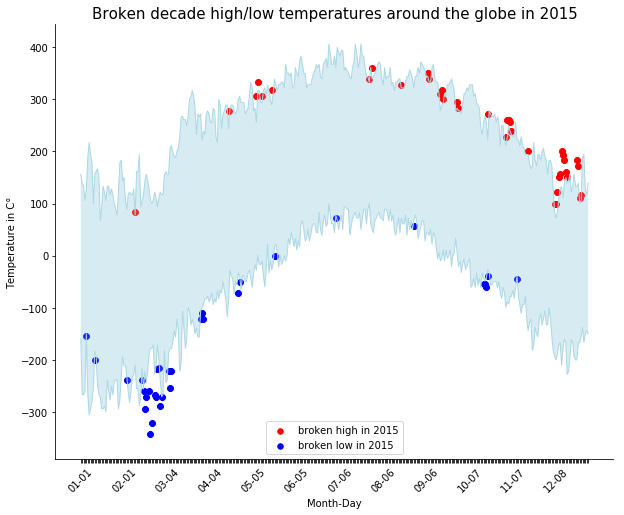

In [13]:
fig